##  Homework 2 - Problem 5 : Handwritten digits

### Student: Dimitrios Tanoglidis

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Import the MNIST dataset

I downloaded the MNIST data set, which is actually consisted  out of a training set ($\sim 60000$ images) and a test set ($\sim 10000$ images). 

After reading the data, I will combine them into one set and split them into $60\%$ training, $20 \%$ development and $20 \%$ test sets.

In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Combine all them into one dataset - divide the data by 255 to normalize the values
data = np.concatenate((data_train, data_test))/255.
labels = np.concatenate((labels_train, labels_test))

# Print their shapes to see
print(np.shape(data));print(np.shape(labels))
# Print also min and max values
print(np.min(data),np.max(data))

(70000, 784)
(70000, 1)
(0.0, 1.0)


And let's plot a subset (say the first twenty) of them...

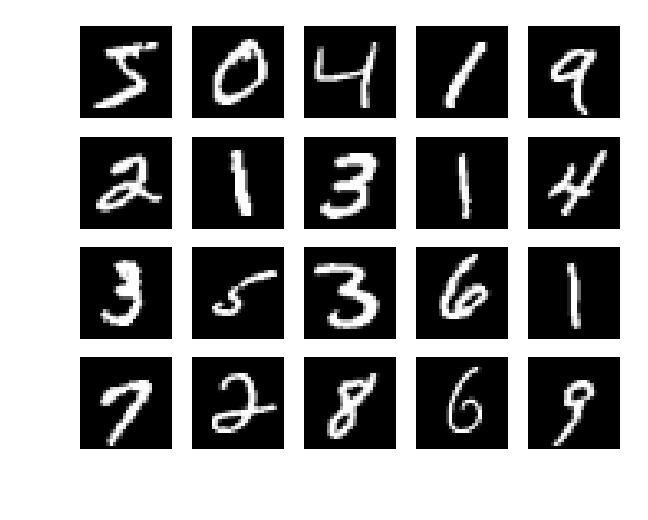

In [3]:
subset = data[0:20,:]
nrows = 4
ncols = 5

plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in xrange(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

Now split the data into $60 \%$ training, $20 \%$ development and $20 \%$ test sets.

First split into $60 \%$-$40\%$ and then take the $40 \%$ and split it into two!

In [4]:
from sklearn.model_selection import train_test_split

# Split into 60% train set and 40% "rest" set - we will use it to further sub-split
data_train, data_rest, labels_train, labels_rest = train_test_split(data, labels, train_size = 0.60, random_state=42)

# Further split the rest set into development and test sets
data_devel, data_test, labels_devel, labels_test = train_test_split(data_rest, labels_rest, train_size = 0.50, random_state=42)

# Print their sizes:
print(np.shape(data_train),np.shape(data_devel), np.shape(data_test))

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((42000, 784), (14000, 784), (14000, 784))


## Part 1: PCA

In this part I will perform the Principal Components Analysis (PCA) on the training data.


#### (a) Extract principal components

Here I will follow the more intuitive approach of eigendecomposition of the covariance matrix of our features.

In [5]:
# Subtract the means
data_train_new = np.zeros((42000,784))

for i in range(784):
    data_means = np.sum(data_train[:,i])/42000.0
    data_train_new[:,i] = data_train[:,i] - data_means

# ===================================================
# Get the covariance matrix
cov_mat = np.cov(data_train_new.T)

# Get eigenvectors - eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Keep real part - imaginary part is zero as it should, but for some reason the output 
# gives a +0j imaginary part which is annoying
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

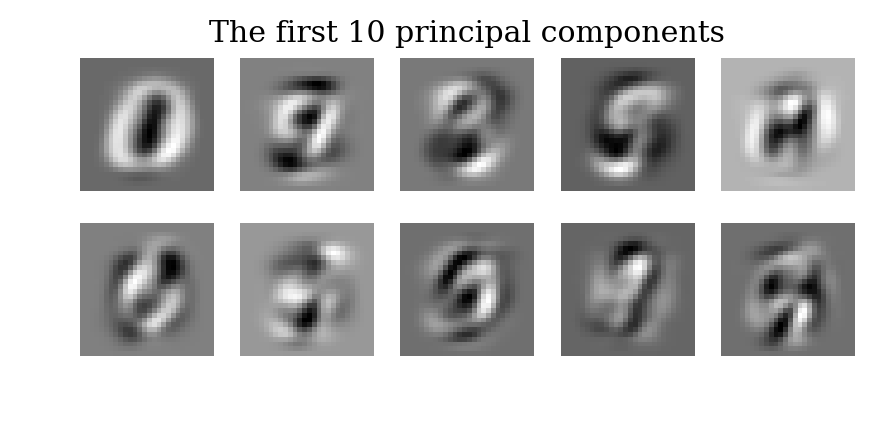

In [6]:
# Eigenvectors are the columnts of the matrix
eig_vecs_sub = (eig_vecs.T)[0:10]

nrows = 2
ncols = 5

plt.figure(figsize=(ncols, nrows))



for i in xrange(nrows*ncols):
    if (i==3):
        plt.title("The first 10 principal components")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(eig_vecs_sub[i].reshape((28,28)), cmap='gray')
    plt.axis('off')


plt.axis('off')
plt.show()

#### (b) Plot variance

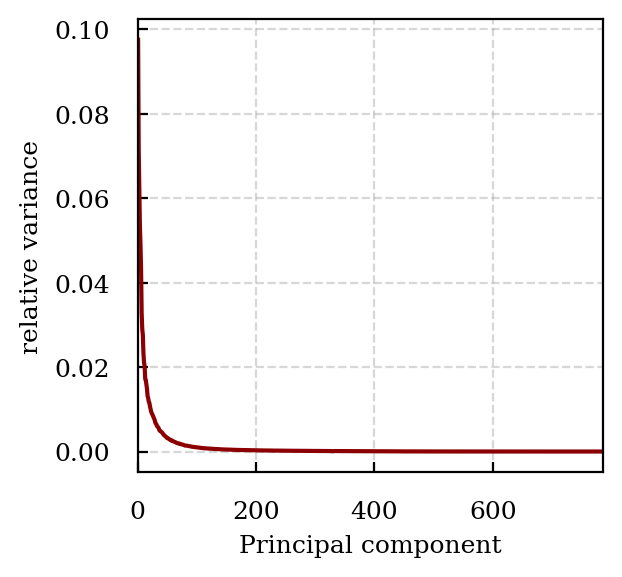

In [16]:
prin_comp = np.arange(1,785)

plt.figure(figsize=(3, 3))

plt.plot(prin_comp, eig_vals/np.sum(eig_vals), c = 'darkred')
plt.xlim(0,785)
plt.grid(ls='--',alpha=0.5)

plt.xlabel('Principal component');plt.ylabel('relative variance')
plt.show()

Let's also plot the variance up to the $\sim 100$th principal component


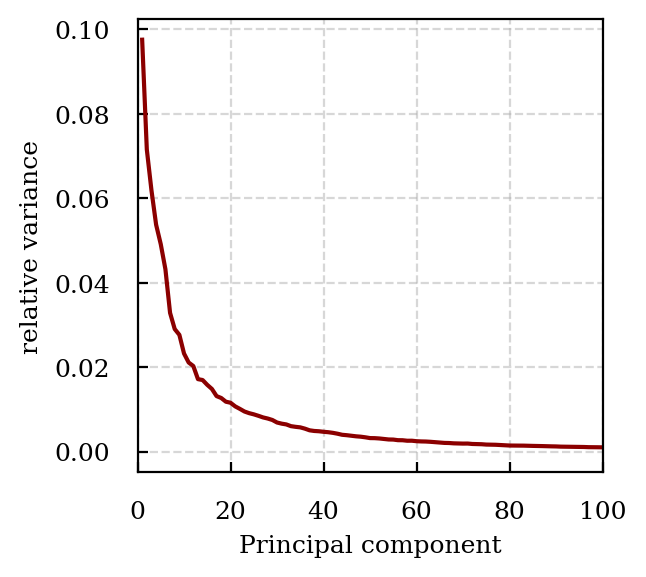

In [13]:
plt.figure(figsize=(3, 3))

plt.plot(prin_comp, eig_vals/np.sum(eig_vals), c = 'darkred')
plt.xlim(0,100)
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Principal component');plt.ylabel('relative variance')
plt.show()